# 1. Data Loading

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data.csv")

data.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x18,y18,z18,x19,y19,z19,x20,y20,z20,label
0,0.688042,0.700020,2.561087e-07,0.640759,0.663233,-0.022524,0.608725,0.605538,-0.035291,0.592945,...,0.765235,0.480283,-0.059032,0.776120,0.438878,-0.065384,0.784501,0.398382,-0.069742,open
1,0.711716,0.716972,2.573172e-07,0.664054,0.684561,-0.022689,0.632173,0.627511,-0.035391,0.618769,...,0.793670,0.505004,-0.061250,0.805855,0.464771,-0.067961,0.815643,0.425370,-0.072280,open
2,0.548860,0.611752,2.525175e-07,0.481311,0.592329,-0.021184,0.423613,0.532470,-0.033919,0.387368,...,0.577573,0.345062,-0.076135,0.576743,0.294505,-0.085051,0.572816,0.246706,-0.091199,open
3,0.791440,0.529967,2.680049e-07,0.756496,0.480869,-0.021271,0.738438,0.414938,-0.032568,0.732894,...,0.885519,0.325044,-0.052023,0.899423,0.287775,-0.056960,0.911963,0.251833,-0.060264,open
4,0.669671,0.467266,9.930871e-08,0.650013,0.430608,-0.008232,0.639716,0.386478,-0.012907,0.635871,...,0.741437,0.364336,-0.026824,0.750501,0.344461,-0.028599,0.757931,0.325684,-0.029970,open


In [20]:
# Create a 3D hand plot function

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plots
import numpy as np 


def plot_hand(landmarks):
    connections = [
    (0, 1), (1, 2), (2, 3), (3, 4),     # Thumb
    (0, 5), (5, 6), (6, 7), (7, 8),     # Index
    (0, 9), (9, 10), (10, 11), (11, 12),# Middle
    (0, 13), (13, 14), (14, 15), (15, 16), # Ring
    (0, 17), (17, 18), (18, 19), (19, 20)  # Pinky
]

    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(111, projection="3d")
    
    width  = landmarks[:, 0]   # X (width)
    height = landmarks[:, 1]   # Y (height)
    depth  = landmarks[:, 2]   # Z (depth)
    
    # Plot using raw columns (X, Y, Z)
    ax.scatter(width, height, depth, c="r", marker="o")
    
    for start, end in connections:
        xs = [width[start], width[end]]
        ys = [height[start], height[end]]
        zs = [depth[start], depth[end]]
        ax.plot(xs, ys, zs, c='k')
    
    ax.set_xlabel('Width (X)')
    ax.set_ylabel('Height (Y)')
    ax.set_zlabel('Depth (Z)')
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    if (width + height).min().item() < 0:    
        ax.set_xlim(-1, 1)   # Width range
        ax.set_ylim(-1, 1)   # Height range
    else:
        ax.set_xlim(0, 1)   # Width range
        ax.set_ylim(0, 1)   # Height range    
    ax.set_zlim(-0.2, 0.2)  # Depth range

    ax.grid(True)
    
    ax.view_init(elev=270, azim=90)
    plt.show()


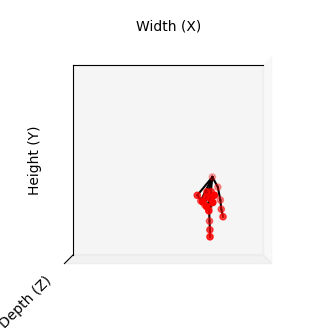

point_down


In [4]:
# Plotting with matplotlib
import numpy as np
choice = np.random.randint(0, len(data))
sample = np.array(data.iloc[choice][:-1]).reshape(-1, 3)
gesture = data.iloc[choice]["label"]

plot_hand(sample)

print(gesture)

# 2. Data Preprocessing

## 2.1 Dataset class 

In [5]:
import torch
from torch.utils.data import Dataset

class LandmarkData(Dataset):
    def __init__(self, csv_file, transform=None):
        df = pd.read_csv(csv_file)
        
        self.X = df.iloc[:, :-1].values.astype('float32')
        self.label_str = df.iloc[:, -1].values

        self.label_to_idx = {label : idx for idx, label in enumerate(sorted(set(self.label_str)))}
        self.idx_to_label = {idx : label for label, idx in self.label_to_idx.items()}

        self.y = [self.label_to_idx[label] for label in self.label_str]

        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        features = torch.tensor(self.X[idx])
        label = torch.tensor(self.y[idx], dtype=torch.long)

        if self.transform:
            features = self.transform(features)


        return features, label

In [6]:
# Example: 

data = LandmarkData(
    csv_file = "data.csv"
)

data[np.random.randint(0, len(data))]

(tensor([ 3.7371e-01,  5.5149e-01, -3.9597e-07,  3.2044e-01,  5.4853e-01,
         -4.0027e-03,  2.6072e-01,  5.0284e-01, -7.1124e-03,  2.2577e-01,
          4.6382e-01, -1.4179e-02,  1.9195e-01,  4.4398e-01, -2.1650e-02,
          2.7906e-01,  3.9347e-01, -3.0888e-03,  2.4141e-01,  3.2504e-01,
         -2.4158e-02,  2.1607e-01,  2.8522e-01, -3.6259e-02,  1.9500e-01,
          2.5020e-01, -4.5543e-02,  3.0964e-01,  3.8073e-01, -1.3981e-02,
          2.6842e-01,  3.6509e-01, -4.7429e-02,  2.8543e-01,  4.3715e-01,
         -4.9796e-02,  3.0681e-01,  4.6104e-01, -4.3683e-02,  3.4381e-01,
          3.7483e-01, -2.7593e-02,  3.0201e-01,  3.6592e-01, -6.0605e-02,
          3.1657e-01,  4.3629e-01, -4.6199e-02,  3.3661e-01,  4.5377e-01,
         -2.8695e-02,  3.8293e-01,  3.7451e-01, -4.1933e-02,  3.4363e-01,
          3.6595e-01, -6.1371e-02,  3.4637e-01,  4.1796e-01, -4.9240e-02,
          3.6188e-01,  4.3202e-01, -3.5900e-02]),
 tensor(3))

In [7]:
class TripletWrapper(Dataset):
    def __init__(self, base_data):
        self.base = base_data

        self.labels = [label for _, label in base_data]
        
        # Group indices by label for sampling
        self.class_to_indices = {}
        for idx, label in enumerate(self.labels):
            self.class_to_indices.setdefault(label.item() if torch.is_tensor(label) else label, []).append(idx)

    def __len__(self):
        return len(self.base)

    def __getitem__(self, idx):
        anchor_feat, anchor_label = self.base[idx]
        anchor_label_val = anchor_label.item() if torch.is_tensor(anchor_label) else anchor_label

        # Positive (same label)
        pos_idx = np.random.choice([i for i in self.class_to_indices[anchor_label_val] if i != idx])
        positive_feat, _ = self.base[pos_idx]

        # Negative (different label)
        neg_label_val = np.random.choice([l for l in self.class_to_indices.keys() if l != anchor_label_val])
        neg_idx = np.random.choice(self.class_to_indices[neg_label_val])
        negative_feat, _ = self.base[neg_idx]

        return anchor_feat, positive_feat, negative_feat


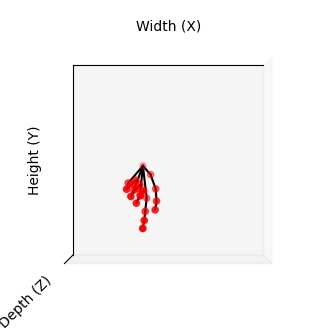

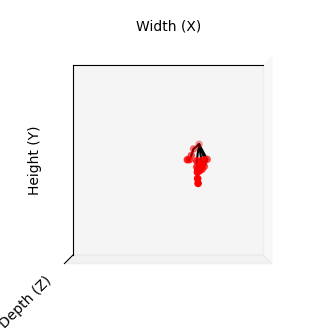

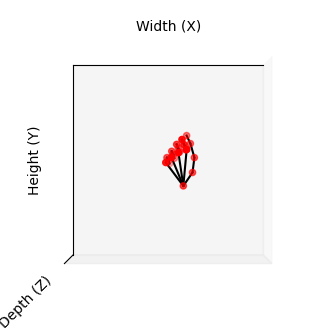

In [8]:
triplet_data = TripletWrapper(data)

example = np.random.randint(len(triplet_data))

plot_hand(triplet_data[example][0].reshape(-1, 3))
plot_hand(triplet_data[example][1].reshape(-1, 3))
plot_hand(triplet_data[example][2].reshape(-1, 3))

## 2.2 Normalization

In [9]:
class HandNormalizer:
    def __init__(self, wrist_idx=0):
        self.wrist_idx = wrist_idx

    def __call__(self, landmarks):
        landmarks = np.array(landmarks).reshape(-1, 3)

        # 1. Translate: wrist at origin
        wrist = landmarks[self.wrist_idx]
        landmarks -= wrist

        # 2. Scale: max distance from wrist to any point = 1
        scale = np.max(np.linalg.norm(landmarks, axis=1))
        if scale > 1e-8:
            landmarks /= scale

        return landmarks.flatten()


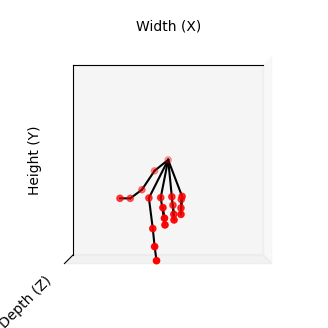

tensor(2)


In [10]:
choice = np.random.randint(0, len(data))
sample, gesture = data[choice]
normalizer = HandNormalizer()

sample = sample.reshape(-1, 3)
scaled_sample = normalizer(sample).reshape(-1, 3)

plot_hand(scaled_sample)
# print(sample)
# print(scaled_sample)

print(gesture)

In [11]:
print(scaled_sample.mean(), scaled_sample.std(), scaled_sample.min(), scaled_sample.max())

0.09665709 0.30443296 -0.47609425 0.979016


## 2.3 Feature Engineer

In [12]:
class HandFeature:
    def __init__(self, methods=["coords", "distances", "angle"]):
        self.methods = methods

    def __call__(self, landmarks):
        landmarks = np.array(landmarks).reshape(-1, 3)

        features = []

        if "coords" in self.methods:
            features.extend(landmarks.flatten())

        if "distances" in self.methods:
            for i in range(len(landmarks)):
                for j in range(i+1, len(landmarks)):
                    dist = np.linalg.norm(landmarks[i] - landmarks[j])
                    features.append(dist)
                    
        if "angle" in self.methods:
            finger_chains = [
                [0, 1, 2, 3, 4],     # Thumb
                [0, 5, 6, 7, 8],     # Index
                [0, 9, 10, 11, 12],  # Middle
                [0, 13, 14, 15, 16], # Ring
                [0, 17, 18, 19, 20]  # Pinky
            ]
            for chain in finger_chains:
                for k in range(len(chain)-2):
                    v1 = landmarks[chain[k+1]] - landmarks[chain[k]]
                    v2 = landmarks[chain[k+2]] - landmarks[chain[k+1]]
                    cosang = np.dot(v1, v2) / (np.linalg.norm(v1)*np.linalg.norm(v2))
                    angle = np.degrees(np.arccos(np.clip(cosang, -1.0, 1.0)))
                    features.append(angle)

        return np.array(features, dtype=np.float32)

        

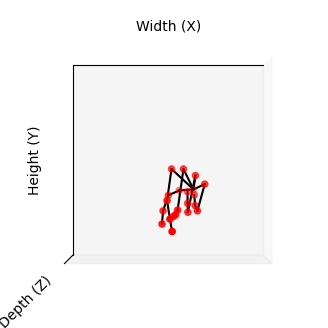

Size of Input:  288
tensor(2)


In [13]:
choice = np.random.randint(0, len(data))
sample, gesture = data[choice]
FE = HandFeature()

sample = sample.reshape(-1, 3)
FE_sample = FE(sample)

plot_hand(sample)

print("Size of Input: ", FE_sample.shape[0])
print(gesture)

## 2.4 Processing Pipeline

In [14]:
from torchvision import transforms


pipeline = transforms.Compose([
    HandNormalizer(),
    HandFeature(),
])

raw_data = LandmarkData(
    csv_file = "data.csv",
    transform = pipeline,
)

dataset = TripletWrapper(raw_data)



In [ ]:
from torch.utils.data import DataLoader, random_split

BATCH_SIZE = 32

dataset_size = len(dataset)
train_size = int(0.8 * dataset_size)
val_size = dataset_size - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(
    dataset = train_dataset,
    batch_size = BATCH_SIZE,
    shuffle = True
)

val_loader = DataLoader(
    dataset = val_dataset,
    batch_size = BATCH_SIZE,
    shuffle = False
)

# 3. Training

## 3.1 Embedding Model

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LandmarkEmbedding(nn.Module):
    def __init__(self, input_dim, emb_dim = 128):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),  nn.ReLU(),
            nn.Linear(256, 128), nn.ReLU(),
            nn.Linear(128, emb_dim)
        )

    def forward(self, X):
        z = self.net(X)
        return F.normalize(z, p=2, dim=1)
        


In [30]:
import torch
from torch.optim import Adam
from torch.nn import TripletMarginLoss

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

LR = 1e-3
print("Learning Rate: ", LR)

Device:  cuda
Learning Rate:  0.001


In [40]:
model = LandmarkEmbedding(input_dim = 288).to(device)

optimizer = Adam(model.parameters(), lr=LR, weight_decay=1e-4)
criterion = TripletMarginLoss(margin=.3, p=2)

def run_epoch(loader, train=True):
    model.train(mode=train)
    epoch_loss = 0.0

    with torch.set_grad_enabled(train):
        for a, p, n in train_loader:
            a, p, n = a.to(device), p.to(device), n.to(device)
            za, zp, zn = model(a), model(p), model(n)

            loss = criterion(za, zp, zn)

            if train:
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            epoch_loss += loss.item()

        return epoch_loss / max(1, len(loader))
        
for epoch in range(20):
    tr = run_epoch(train_loader, train=True)
    va = run_epoch(val_loader,   train=False)
    print(f"Epoch {epoch+1:02d} | train {tr:.4f} | val {va:.4f}")


Epoch 01 | train 0.0584 | val 0.0750
Epoch 02 | train 0.0312 | val 0.0607
Epoch 03 | train 0.0262 | val 0.0477
Epoch 04 | train 0.0195 | val 0.0682
Epoch 05 | train 0.0344 | val 0.0410
Epoch 06 | train 0.0156 | val 0.0219
Epoch 07 | train 0.0098 | val 0.0239
Epoch 08 | train 0.0067 | val 0.0429
Epoch 09 | train 0.0045 | val 0.0280
Epoch 10 | train 0.0084 | val 0.0119
Epoch 11 | train 0.0162 | val 0.0025
Epoch 12 | train 0.0038 | val 0.0147
Epoch 13 | train 0.0075 | val 0.0140
Epoch 14 | train 0.0040 | val 0.0172
Epoch 15 | train 0.0052 | val 0.0060
Epoch 16 | train 0.0078 | val 0.0000
Epoch 17 | train 0.0000 | val 0.0063
Epoch 18 | train 0.0003 | val 0.0014
Epoch 19 | train 0.0005 | val 0.0007
Epoch 20 | train 0.0000 | val 0.0000


## 3.2 Saving

In [87]:
with torch.no_grad():
    # Unpack raw_data into separate lists of numpy arrays and targets
    landmarks, targets = zip(*raw_data)
    
    # Convert landmarks (a list of numpy arrays) into a PyTorch tensor
    landmarks = torch.from_numpy(np.array(landmarks)).to(device)
    
    # Convert targets (a list of numbers) into a PyTorch tensor
    targets = torch.tensor(targets).to(device)

    # Get unique target labels
    unique_targets = torch.unique(targets)
    
    # Calculate embeddings for all landmarks at once
    embeddings = model(landmarks)

    # Prepare a list to store the mean embeddings
    mean_embeddings = []
    
    # Efficiently calculate the mean embedding for each unique target
    for target in unique_targets:
        mask = (targets == target)
        mean_embedding = embeddings[mask].mean(dim=0)
        mean_embeddings.append(mean_embedding)

    # Stack the mean embeddings into a single tensor
    mean_embeddings = torch.stack(mean_embeddings)
    
    # Create a mapping from unique targets to their mean embeddings
    mapper = {target.item(): mean_embeddings[i] for i, target in enumerate(unique_targets)}
    converter = raw_data.idx_to_label

converter

{0: 'close', 1: 'open', 2: 'point_down', 3: 'point_up'}

In [16]:
import torch.nn.functional as F

def converter(embeded, prototype, label):
    similarities = F.cosine_similarity(embeded, prototype)
    # print(similarities)  # higher = more similar
    best_idx = torch.argmax(similarities)

    return label[best_idx]

In [94]:
labels = list(mapper.keys())
prototypes = list(mapper.values())


prototypes_tensor = torch.stack(prototypes).cpu()
np.save('prototypes.npy', prototypes_tensor.numpy())

labels_array = np.array(labels)
labels_array = [converter[i] for i in labels_array]
np.save('labels.npy', labels_array, allow_pickle=True)

In [95]:
torch.save(model.state_dict(), "model.pth")

In [20]:
torch.save(pipeline, "pipeline.pt")

# 4. Testing

In [36]:
from models import LandmarkEmbedding
import torch

model = LandmarkEmbedding(288)
model.load_state_dict(torch.load('model.pth'))


C:\Users\vglg3\AppData\Local\Temp\ipykernel_17448\4071785391.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model.pth'))


<All keys matched successfully>

In [37]:
import cv2
import mediapipe as mp
import numpy as np

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1)

# Initialize webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Flip the frame for a natural selfie-view
    frame = cv2.flip(frame, 1)

    # Convert the BGR image to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame and detect hands
    results = hands.process(rgb_frame)

    if results.multi_hand_landmarks:
        # Get landmarks for the first detected hand
        hand_landmarks = results.multi_hand_landmarks[0]
        
        # Now we have the landmarks, proceed to the next step
        # The loop will break to show the next steps
        break

cap.release()
cv2.destroyAllWindows()

In [38]:
# Assuming 'hand_landmarks' is the variable from the previous step
landmark_list = []
for landmark in hand_landmarks.landmark:
    landmark_list.append(landmark.x)
    landmark_list.append(landmark.y)
    landmark_list.append(landmark.z)

# Convert the list to a NumPy array
input_data = np.array(landmark_list)

# Reshape the data to match your model's expected input shape
# The shape is typically (1, 63)
input_data = input_data.reshape(1, -1)
print(f"Prepared input data shape: {input_data.shape}")

Prepared input data shape: (1, 63)


In [45]:
from models import HandNormalizer, HandFeature

pipeline = torch.load("pipeline.pt")
processed = torch.tensor(np.expand_dims(pipeline(input_data), axis=0))

# processed.shape
with torch.no_grad():
    output = model(processed)

output

C:\Users\vglg3\AppData\Local\Temp\ipykernel_17448\1096974008.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pipeline = torch.load("pipeline.pt")


tensor([[ 0.0415, -0.0128, -0.0374, -0.0771, -0.1414,  0.2168, -0.0677,  0.0643,
          0.0844,  0.0557, -0.0012,  0.0743,  0.0301,  0.1018, -0.1100,  0.0707,
          0.0168, -0.0655, -0.0688,  0.0274,  0.1551, -0.0216,  0.0509, -0.1002,
          0.0103, -0.0194, -0.0955,  0.1084, -0.0214, -0.1221,  0.0408,  0.0487,
         -0.0926, -0.0283,  0.1808,  0.1534,  0.0938,  0.0666, -0.1016, -0.0506,
         -0.0740,  0.0749,  0.1168, -0.0231, -0.0450,  0.1054,  0.0695,  0.0594,
          0.0235,  0.0721, -0.0018,  0.1707,  0.0844, -0.0207, -0.0390, -0.1598,
         -0.0481, -0.1484,  0.0153,  0.0867,  0.0325,  0.0600, -0.1341,  0.1269,
         -0.1665, -0.0061,  0.0609, -0.0025,  0.0956, -0.0341,  0.0610,  0.0253,
          0.1423, -0.0215,  0.0121,  0.0238, -0.0605, -0.0357, -0.0364, -0.1827,
          0.1082,  0.0401,  0.1429,  0.0052, -0.0672,  0.0176,  0.0771,  0.1152,
          0.1034,  0.1791, -0.0953,  0.0423, -0.0097, -0.0886, -0.0382,  0.0638,
         -0.0334, -0.1719, -

In [40]:
import numpy as np 

prototype = torch.tensor(np.load("prototypes.npy"))
labels = np.load("labels.npy")

In [41]:
result = converter(output, prototype, labels)

print(result)

point_down


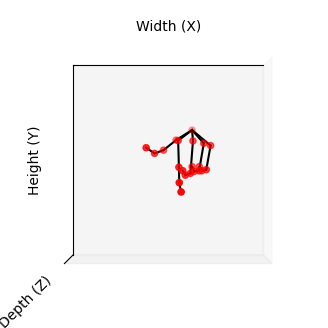

In [42]:
plot_hand(input_data.reshape(-1, 3))